# Samarth
#102083050
#4CO27

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
import xgboost as xg

# Importing Dataset

In [2]:
df = pd.read_excel('DATASET.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   101 non-null    object 
 1   year         1009 non-null   int64  
 2   Para-1       1009 non-null   float64
 3   Para-2       1009 non-null   float64
 4   Para-3       1009 non-null   float64
 5   Para-4       1009 non-null   float64
 6   Para-5       1009 non-null   int64  
 7   Para-6       1009 non-null   int64  
 8   Para-7       1009 non-null   int64  
 9   Para-8       1009 non-null   int64  
 10  Para-9       1009 non-null   float64
 11  Para-10      1009 non-null   float64
 12  Para-11      1009 non-null   float64
 13  Para-12      1009 non-null   int64  
 14  Para-13      1007 non-null   float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

E:\Anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
E:\Anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


# Data Preprocessing

In [3]:
df = df.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Replacong empty cells with zero
df.fillna(0, inplace=True)

col = 0
for row in range(100):
  df.iloc[col:col + 10, 0] = df.iloc[col, 0]
  col += 10
    

In [5]:
test_data = df.loc[df['year'] == 10]
test_data

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.columns = df.columns.str.replace('Unnamed: 0', 'Group')
test_data.columns = test_data.columns.str.replace('Unnamed: 0', 'Group')
df

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,Sec_101,6,454.0,931.8,13.6,125.0,13,116,4150,830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,Sec_101,7,454.0,703.0,14.5,17.0,13,118,4150,830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1006,Sec_101,8,454.0,1124.1,14.9,45.0,18,117,4200,840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007,Sec_101,9,454.0,1462.3,13.2,62.0,27,117,4400,720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Defining Model

In [52]:
model = xg.XGBRegressor(n_estimators=500, max_depth=8, eta=0.5)

In [53]:
predicted = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
headers = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

# Training And Predicting Model

In [54]:
rmse = []
n = 0
idx = 0
for col in [10, 11, 12, 13, 14]:
  res = 0
  count = 0
  for row in range(0, 1000, 10):
    xtrain = df.iloc[row:row+9, 1:10]
    ytrain = df.iloc[row:row+9, col]
    xtest = df.iloc[row+9, 1:10].to_numpy()
    ytest = df.iloc[row+9, col]
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest.reshape(1,-1))[0]
    predicted[headers[idx]].append(ypred)
    res += (ytest - ypred)**2
    count += 1
    n += 1
    print(res)
  rmse.append(res)
  idx += 1

179.59245816987905
422.9991870974053
432.6169367670526
446.32255737028106
446.32255737028106
446.6967745478602
446.6967745478602
446.6967745478602
446.6967745478602
7056.554806697934
7115.859893717148
7131.077380905412
7131.077380905412
7133.330632201181
7133.330633215392
7225.513837800854
7231.769502001691
7231.769502001691
7249.421962697531
7904.832588675195
7905.473576862672
12209.033774503481
19323.575304261612
19346.626614242996
19361.84818504626
24054.230982082634
25860.480982082634
25860.480982082634
26344.55752319444
26344.567523194437
26345.058842134997
28042.59867514581
106948.10711197885
110084.23391990137
110824.13007575208
110826.3836568878
110831.23212341675
110831.48393188564
110834.9597724018
112011.5863678104
112014.83046425822
112034.19889779366
114864.61976249948
114865.83489249428
116355.87841234144
116356.12942913172
116356.12942913172
141605.8321146406
141720.36169447677
141720.36169447677
141720.36169447677
141747.42052648988
141757.54470838033
141990.21533175398

# RMSE Calculations


In [58]:
df_pred = pd.DataFrame.from_dict(predicted)
df_pred
print(rmse)

[189716.92391796995, 124063.3503599675, 20063.22009198036, 18814.246138735223, 1.279495411761087]


In [59]:
for i in rmse:
    val = (i/count)**0.5
    print(val)

43.55650627839312
35.22262772139062
14.164469666027161
13.716503249274293
0.11311478293136963


In [60]:
print(rmse)

[189716.92391796995, 124063.3503599675, 20063.22009198036, 18814.246138735223, 1.279495411761087]


In [61]:
print((sum(rmse)/500)**0.5)

26.557824459246085


# Plots

In [21]:
import random
generator = []
for i in range(25):
  generator.append(random.randint(0,100))

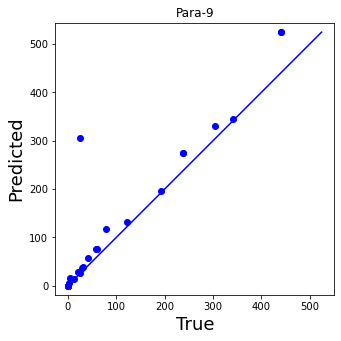

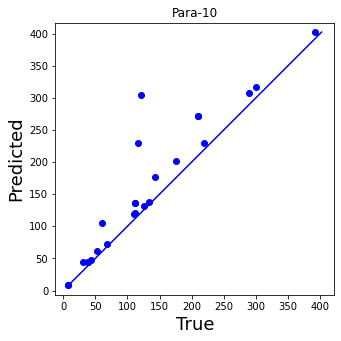

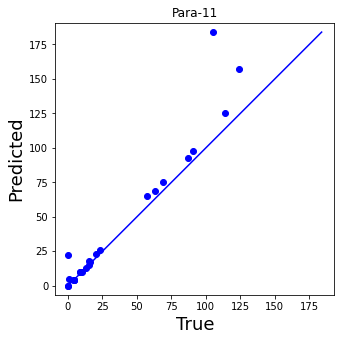

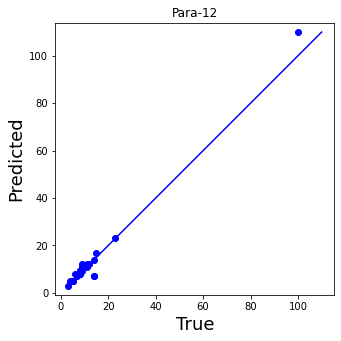

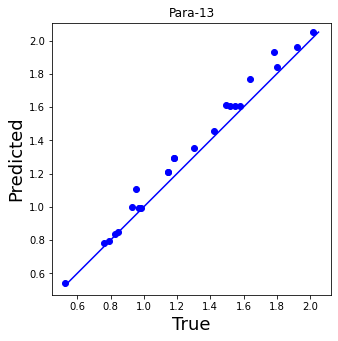

In [22]:
for i in range(5):
  plt.figure(figsize=(5, 5))
  true_value = df_pred.iloc[generator, i]
  predicted_value = test_data.iloc[generator, i + 10]
  plt.scatter(true_value, predicted_value, c='blue')

  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title(headers[i])
  plt.xlabel('True', fontsize=18)
  plt.ylabel('Predicted', fontsize=18)
  plt.axis('equal')
  plt.show()